# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("E:/Data Analysis/Projects/British Airways/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

#### Working with column sales_channel

In [8]:
# Converting Categorical cols to Numerical

df['sales_channel'] = df['sales_channel'].map({"Internet":1,"Mobile":2})

In [9]:
df['sales_channel'].value_counts()

1    44382
2     5618
Name: sales_channel, dtype: int64

#### Working with column trip_type

In [10]:
# Converting Categorical cols to Numerical


df['trip_type'] = df['trip_type'].map({"OneWay":1,"RoundTrip":2,"CircleTrip":3})

In [11]:
df.trip_type.value_counts()

2    49497
1      387
3      116
Name: trip_type, dtype: int64

#### Working with num_passengers

In [12]:
df = df[df['num_passengers']<=4]

In [13]:
# df.num_passengers.value_counts()
df.shape

(48881, 14)

In [14]:
# Getting all column names

df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

**Checking Correlations**

In [15]:
# Calculate correlations
correlations = df.corr()
target_correlations = correlations['booking_complete'].abs()  # Use absolute values for correlations

In [16]:
target_correlations

num_passengers           0.021110
sales_channel            0.041235
trip_type                0.015791
purchase_lead            0.023739
length_of_stay           0.041138
flight_hour              0.006680
flight_day               0.007639
wants_extra_baggage      0.068295
wants_preferred_seat     0.048493
wants_in_flight_meals    0.025904
flight_duration          0.106603
booking_complete         1.000000
Name: booking_complete, dtype: float64

#### Working with length_of_stay

<AxesSubplot:>

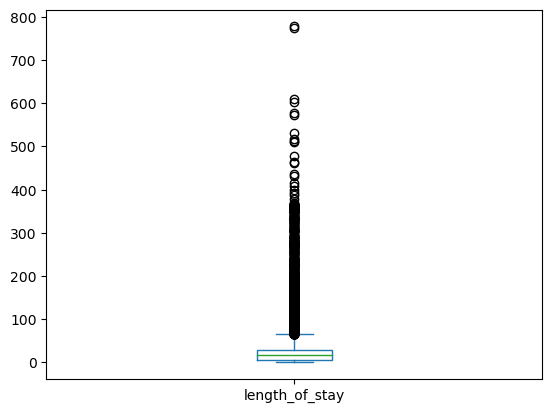

In [17]:
df['length_of_stay'].plot(kind="box")

In [18]:
df = df[df['length_of_stay'] <350]

In [19]:
df.shape

(48808, 14)

#### Working with flight_duration

<AxesSubplot:>

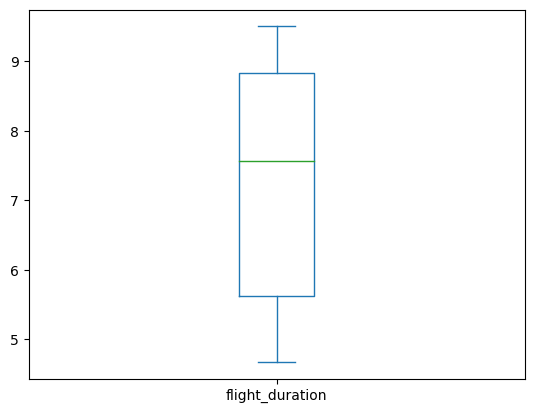

In [20]:
df['flight_duration'].plot(kind="box")

<AxesSubplot:>

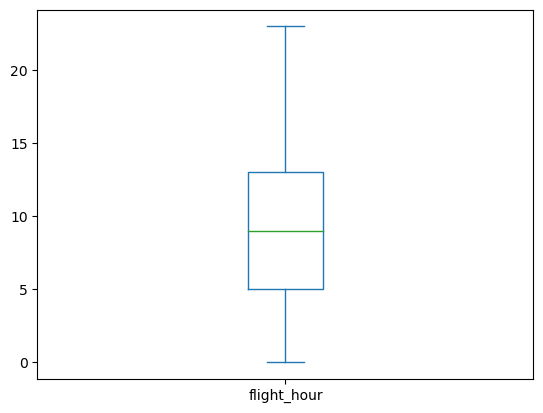

In [21]:
df['flight_hour'].plot(kind="box")

#### Working with purchase_lead

<AxesSubplot:>

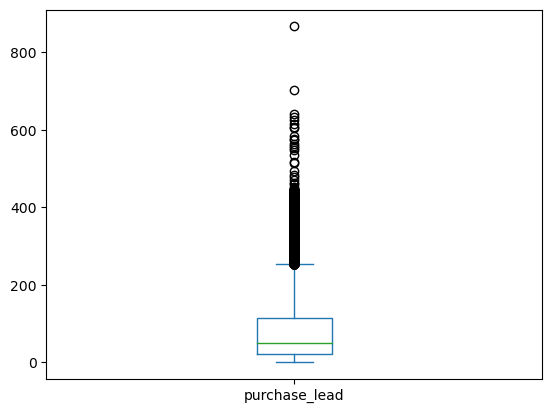

In [22]:
df['purchase_lead'].plot(kind="box")

In [23]:
df = df[df['purchase_lead'] <440]

In [24]:
df.shape

(48763, 14)

#### Features columns and Target columns

In [25]:
# Split dataset in features and target variable

cols = ['purchase_lead','length_of_stay','flight_duration','flight_hour','num_passengers','wants_extra_baggage', 'wants_preferred_seat',
       'sales_channel']

X = df[cols] #Features

y = df['booking_complete'] # Target variable

**Logistic Regression**

In [26]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split


In [27]:
# split into train test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# Feature scaling (standardization)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Create a logistic regression model

logistic_model = LogisticRegression(random_state=42)

In [30]:
# Train the model on the training data

logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [31]:
# Make predictions on the test data

y_pred = logistic_model.predict(X_test)

In [32]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)


In [33]:
# Display the evaluation metrics

print("Accuracy:", accuracy)

Accuracy: 0.8545063057520763


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

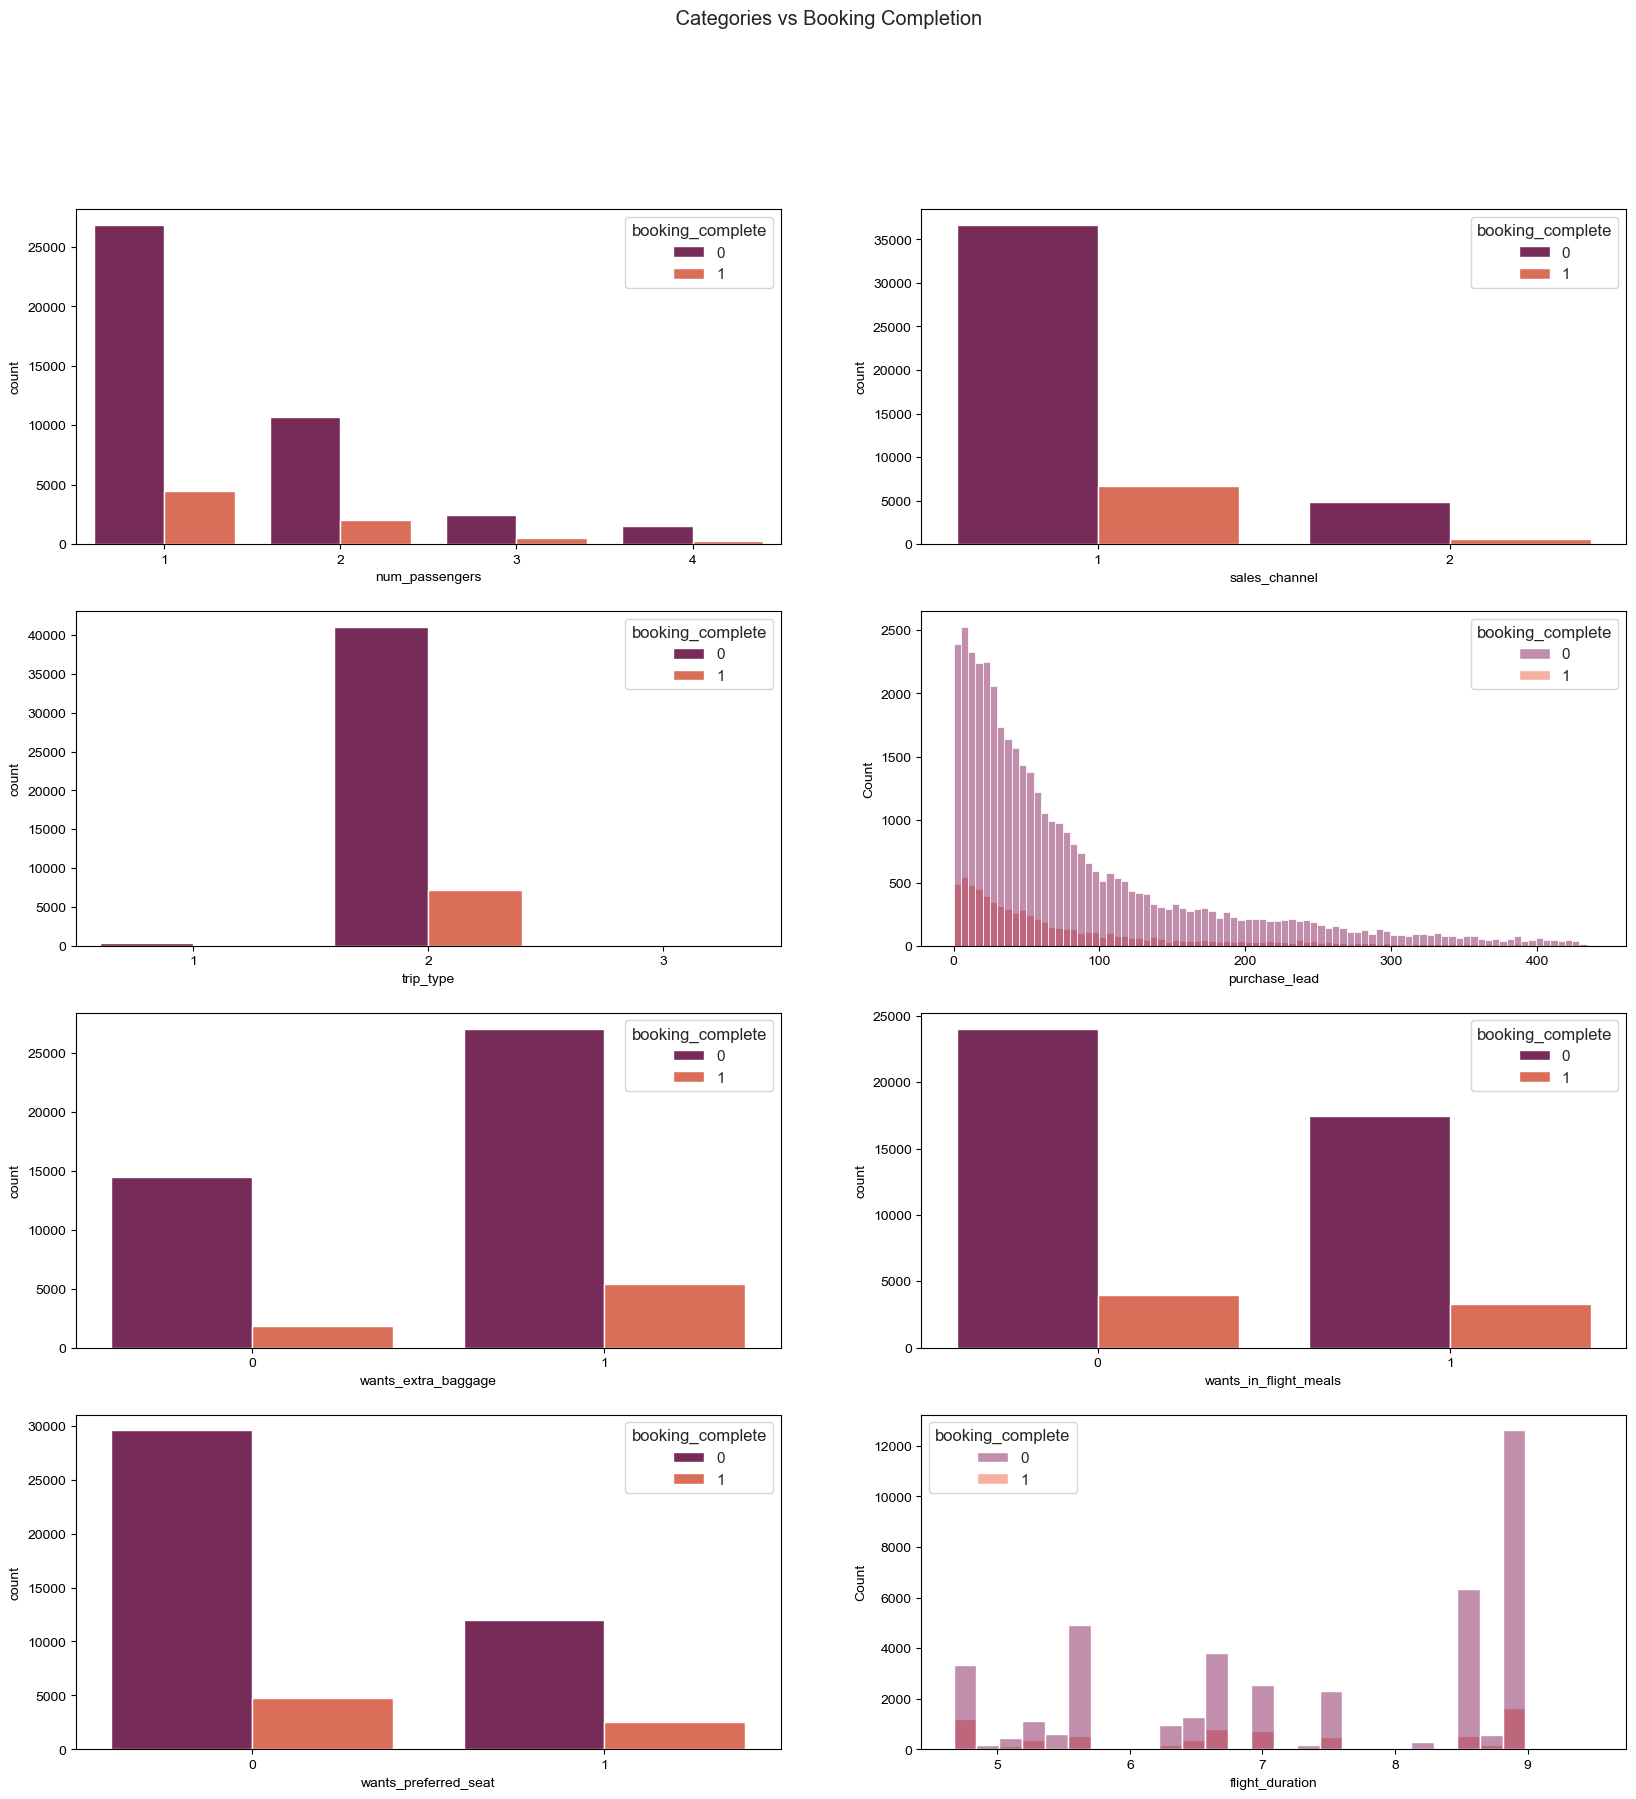

In [35]:
fig,axes = plt.subplots(4,2,figsize=(20,20),squeeze=False)

sns.set(style='whitegrid')

plt.suptitle(" Categories vs Booking Completion")

sns.countplot(ax = axes[0,0],hue=df.booking_complete, x=df.num_passengers, data=df,palette='rocket')
sns.countplot(ax = axes[0,1],hue=df.booking_complete, x=df.sales_channel, data=df,palette='rocket')
sns.countplot(ax = axes[1,0],hue=df.booking_complete, x=df.trip_type, data=df,palette='rocket')
sns.histplot(ax = axes[1,1],hue=df.booking_complete, x=df.purchase_lead, data=df,palette='rocket')
sns.countplot(ax = axes[2,0],hue=df.booking_complete, x=df.wants_extra_baggage, data=df,palette='rocket')
sns.countplot(ax = axes[2,1],hue=df.booking_complete, x=df.wants_in_flight_meals, data=df,palette='rocket')
sns.countplot(ax = axes[3,0],hue=df.booking_complete, x=df.wants_preferred_seat, data=df,palette='rocket')
sns.histplot(ax = axes[3,1],hue=df.booking_complete, x=df.flight_duration, data=df,palette='rocket')


plt.show()

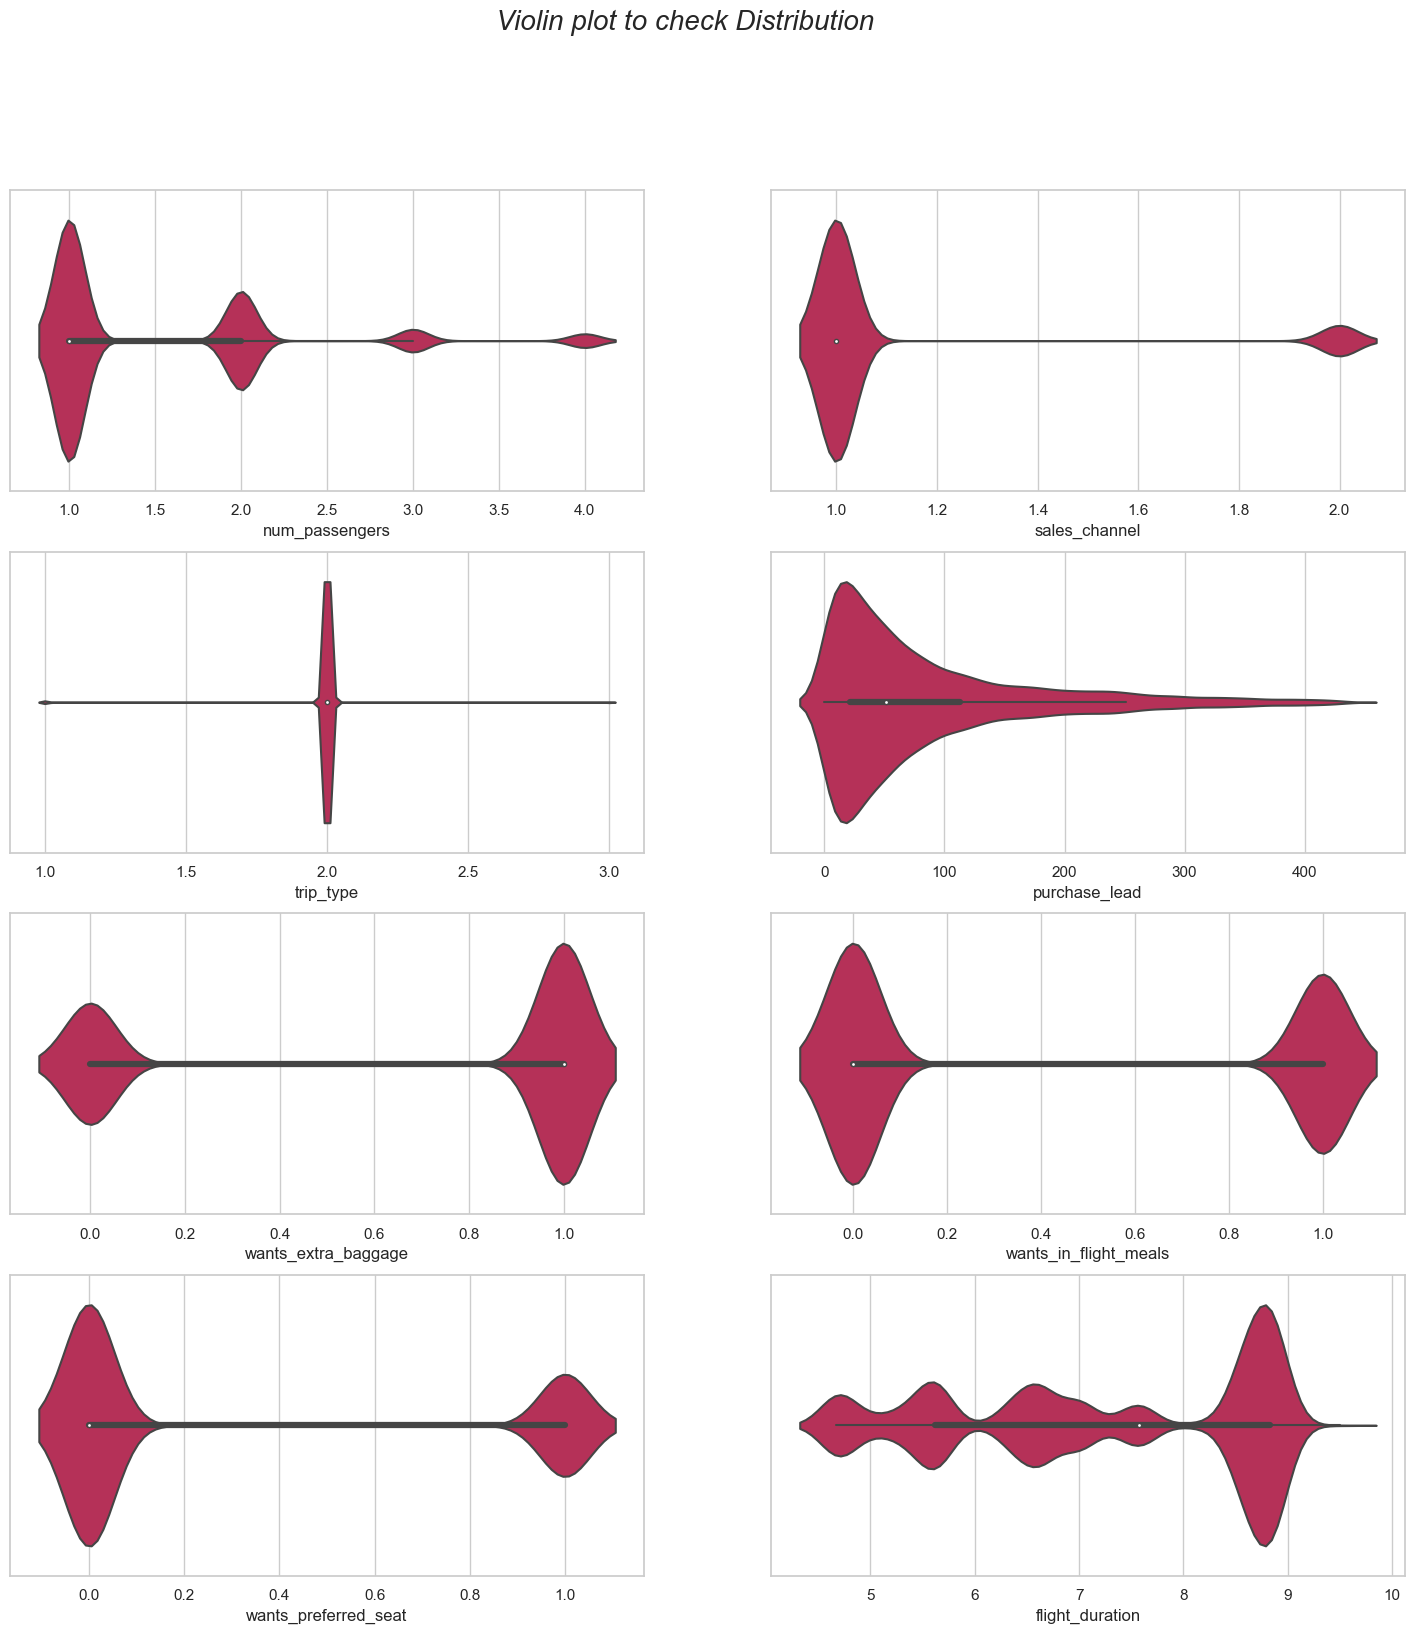

In [36]:
fig,axes = plt.subplots(4,2,figsize=(18,18),squeeze=False)

sns.set(style='whitegrid')

plt.suptitle("Violin plot to check Distribution",fontsize=20,fontstyle='italic')

sns.violinplot(ax = axes[0,0],x=df.num_passengers,data=df,palette='rocket')
sns.violinplot(ax = axes[0,1], x=df.sales_channel, data=df,palette='rocket')
sns.violinplot(ax = axes[1,0], x=df.trip_type, data=df,palette='rocket')
sns.violinplot(ax = axes[1,1], x=df.purchase_lead, data=df,palette='rocket')
sns.violinplot(ax = axes[2,0], x=df.wants_extra_baggage, data=df,palette='rocket')
sns.violinplot(ax = axes[2,1],x=df.wants_in_flight_meals, data=df,palette='rocket')
sns.violinplot(ax = axes[3,0], x=df.wants_preferred_seat, data=df,palette='rocket')
sns.violinplot(ax = axes[3,1], x=df.flight_duration, data=df,palette='rocket')

plt.show()

In [37]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.004080,0.002073,0.226520,-0.116022,0.016765,0.019751,0.123370,0.046109,0.026549,-0.046252,0.020720
sales_channel,-0.004080,1.000000,0.010249,-0.016377,-0.063707,0.020886,0.041663,-0.054407,0.033155,-0.021480,-0.037512,-0.041108
trip_type,0.002073,0.010249,1.000000,-0.003772,0.013704,-0.001333,0.004024,-0.000878,0.006279,0.010486,-0.028582,0.015809
purchase_lead,0.226520,-0.016377,-0.003772,1.000000,-0.073154,0.034031,0.035056,-0.022140,-0.000461,-0.023106,0.068539,-0.023641
length_of_stay,-0.116022,-0.063707,0.013704,-0.073154,1.000000,-0.026162,0.001696,0.194558,0.030771,0.102656,0.144915,-0.047727
flight_hour,0.016765,0.020886,-0.001333,0.034031,-0.026162,1.000000,0.022758,-0.010657,0.013260,0.014018,-0.002388,0.006951
flight_day,0.019751,0.041663,0.004024,0.035056,0.001696,0.022758,1.000000,-0.003363,0.005871,0.009261,0.017993,-0.007434
wants_extra_baggage,0.123370,-0.054407,-0.000878,-0.022140,0.194558,-0.010657,-0.003363,1.000000,0.207398,0.215799,0.058111,0.068502
wants_preferred_seat,0.046109,0.033155,0.006279,-0.000461,0.030771,0.013260,0.005871,0.207398,1.000000,0.315757,0.099998,0.048529
wants_in_flight_meals,0.026549,-0.021480,0.010486,-0.023106,0.102656,0.014018,0.009261,0.215799,0.315757,1.000000,0.154885,0.025767


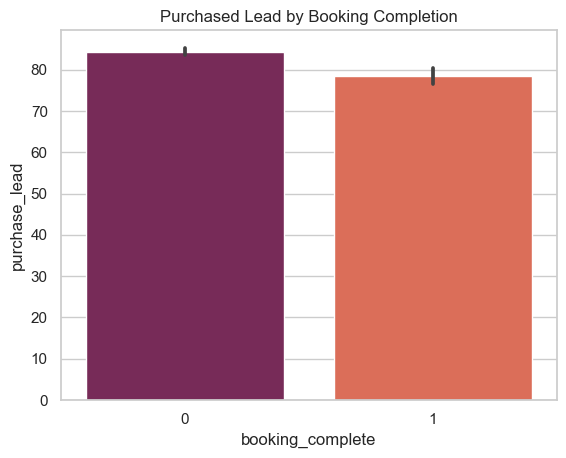

In [38]:
sns.barplot(y=df.purchase_lead,data=df,x=df.booking_complete,palette='rocket')
plt.title("Purchased Lead by Booking Completion")
plt.show()

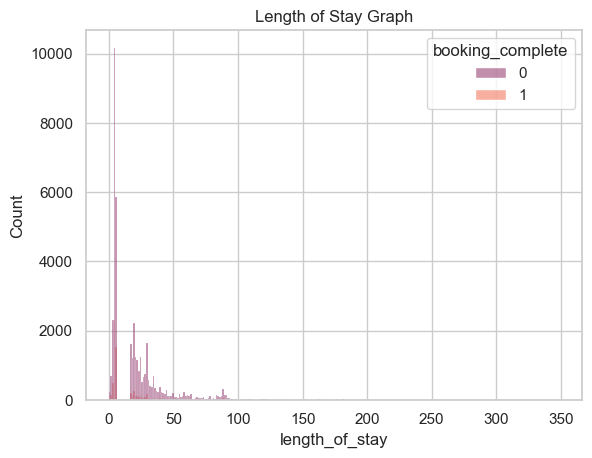

In [39]:
sns.histplot(x=df.length_of_stay,data=df,palette='rocket',hue=df.booking_complete)
plt.title("Length of Stay Graph")
plt.show()

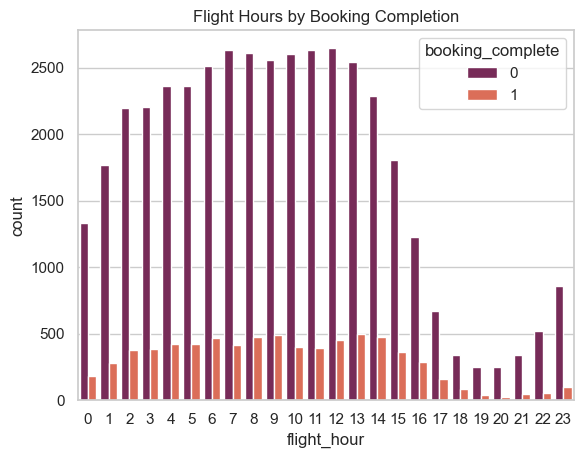

In [40]:
sns.countplot(hue=df.booking_complete,data=df,x=df.flight_hour,palette='rocket')
plt.title("Flight Hours by Booking Completion")
plt.show()

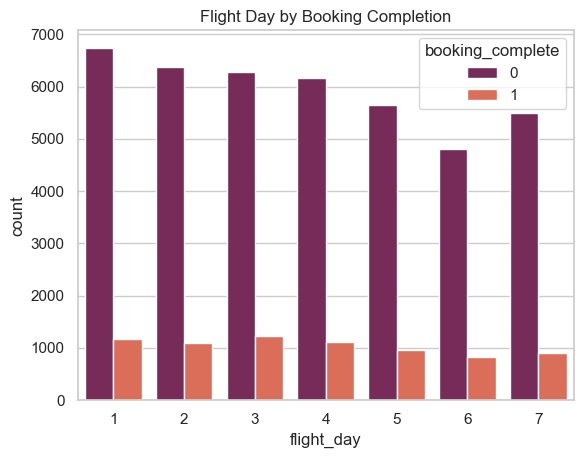

In [41]:
sns.countplot(hue=df.booking_complete,data=df,x=df.flight_day,palette='rocket')
plt.title("Flight Day by Booking Completion")
plt.show()

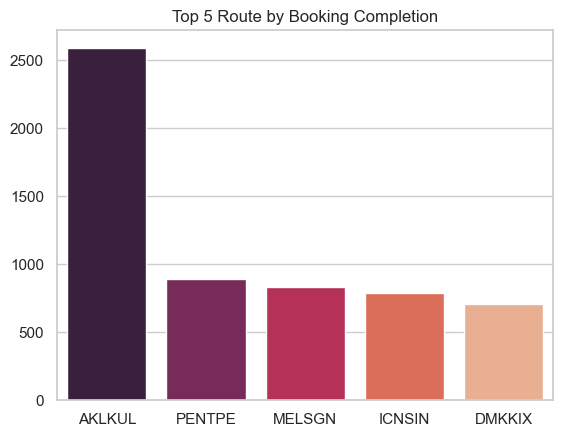

In [42]:
sns.barplot(data=df,x=df.route.value_counts().index[:5],y=df.route.value_counts().values[:5],palette='rocket')
plt.title("Top 5 Route by Booking Completion")
plt.show()